<a href="https://colab.research.google.com/github/HyungJunByun/practice-history/blob/main/_2_hw2_lorenz_equations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 대기물리2_Homework#2_2023-13970_변형준

1. Solve Lorenz equations numerically using the fourth-order Runge-Kutta method. Set initial conditions: (1)x0=1, y0=0, and z0=0. Plot time series of x,y, and z

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 로렌츠 방정식 정의
def lorenz_system(state, sigma, beta, rho):
    x, y, z = state
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return np.array([dxdt, dydt, dzdt])

# 4차 룽게-쿠타 방법
def runge_kutta_4th_order(func, initial_state, t, sigma, beta, rho):
    state = np.array(initial_state)
    states = [state]

    dt = t[1] - t[0]  # 시간 간격

    for _ in range(1, len(t)):
        state=np.array(states[-1])
        k1 = func(state, sigma, beta, rho)
        k2 = func(state + 0.5 * dt * k1, sigma, beta, rho)
        k3 = func(state + 0.5 * dt * k2, sigma, beta, rho)
        k4 = func(state + dt * k3, sigma, beta, rho)

        state += (dt / 6) * (k1 + 2 * k2 + 2 * k3 + k4)
        states.append(state)

    return np.array(states)

# 초기 조건 및 파라미터 설정
initial_state = [1.0, 0, 0]  # x, y, z의 초기값
sigma = 10.0
beta = 8.0 / 3.0
rho = 28.0

# 시간 설정
t = np.linspace(0, 50, 10000)  # 0에서 50까지의 시간 간격

# ODE 통합
solution = runge_kutta_4th_order(lorenz_system, initial_state, t, sigma, beta, rho)

# 결과 시각화
x, y, z = solution.T  # x, y, z 분리

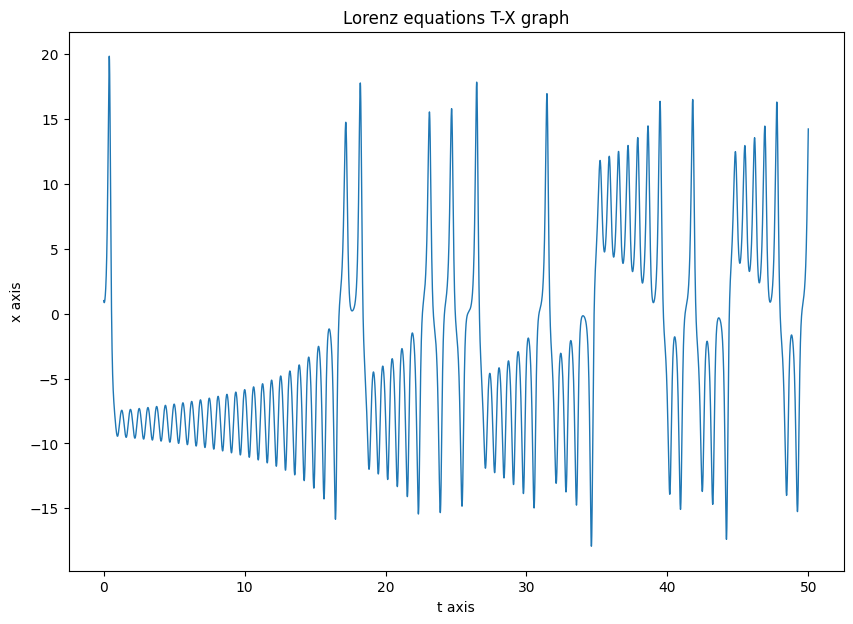

In [ ]:
#t-x 그래프
fig = plt.figure(figsize=(10, 7))
plt.plot(t,x, lw=1)
plt.title("Lorenz equations T-X graph")
plt.xlabel("t axis")
plt.ylabel("x axis")

plt.show()

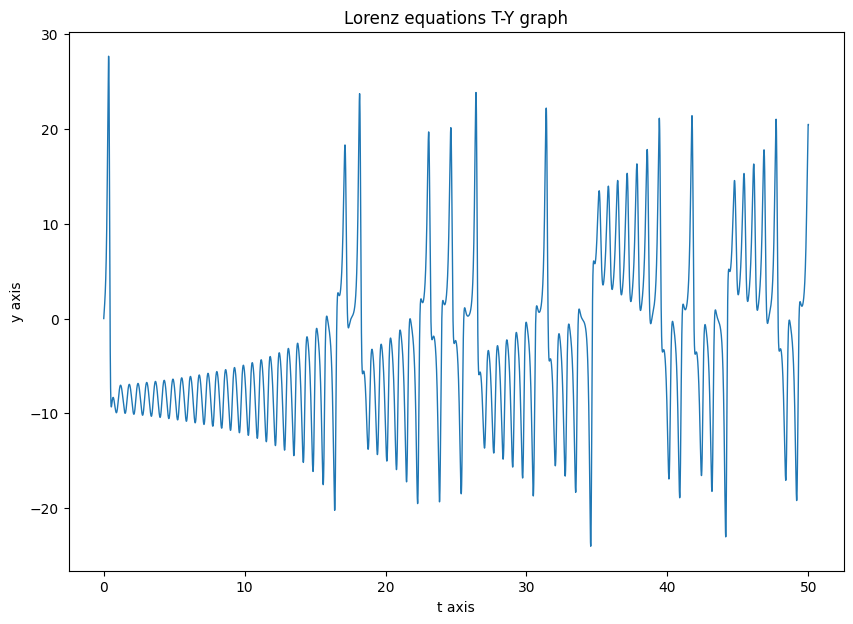

In [ ]:
#t-y 그래프
fig = plt.figure(figsize=(10, 7))
plt.plot(t,y, lw=1)
plt.title("Lorenz equations T-Y graph")
plt.xlabel("t axis")
plt.ylabel("y axis")

plt.show()

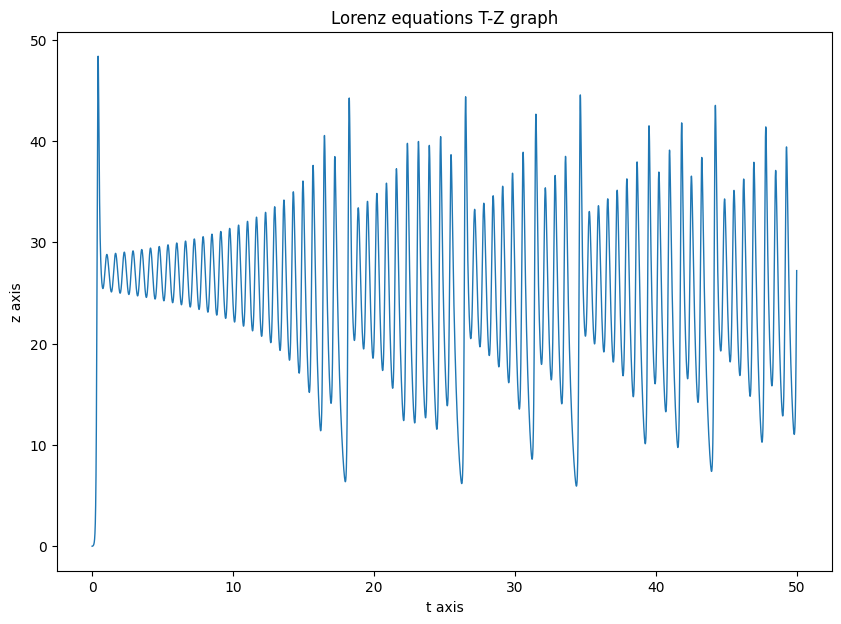

In [ ]:
#t-z 그래프
fig = plt.figure(figsize=(10, 7))
plt.plot(t,z, lw=1)
plt.title("Lorenz equations T-Z graph")
plt.xlabel("t axis")
plt.ylabel("z axis")

plt.show()

2. Solve Lorenz equations numerically. Set slightly different initial conditions: (2)x0=1.1, y0=0, z0=0 and (3)x0=1.01, y0=0, and z0=0. Plot time series of x, y, and z. In plotting, overlap the results obtained using the three different initial conditions. Discuss the results.

In [ ]:
# 초기 조건 및 파라미터 설정
initial_state = [1.1, 0, 0]  # x, y, z의 초기값
sigma = 10.0
beta = 8.0 / 3.0
rho = 28.0

# 시간 설정
t = np.linspace(0, 50, 10000)  # 0에서 50까지의 시간 간격

# ODE 통합
solution = runge_kutta_4th_order(lorenz_system, initial_state, t, sigma, beta, rho)

# 결과 시각화
x2, y2, z2 = solution.T  # x, y, z 분리

In [ ]:
# 초기 조건 및 파라미터 설정
initial_state = [1.01, 0, 0]  # x, y, z의 초기값
sigma = 10.0
beta = 8.0 / 3.0
rho = 28.0

# 시간 설정
t = np.linspace(0, 50, 10000)  # 0에서 50까지의 시간 간격

# ODE 통합
solution = runge_kutta_4th_order(lorenz_system, initial_state, t, sigma, beta, rho)

# 결과 시각화
x3, y3, z3 = solution.T  # x, y, z 분리

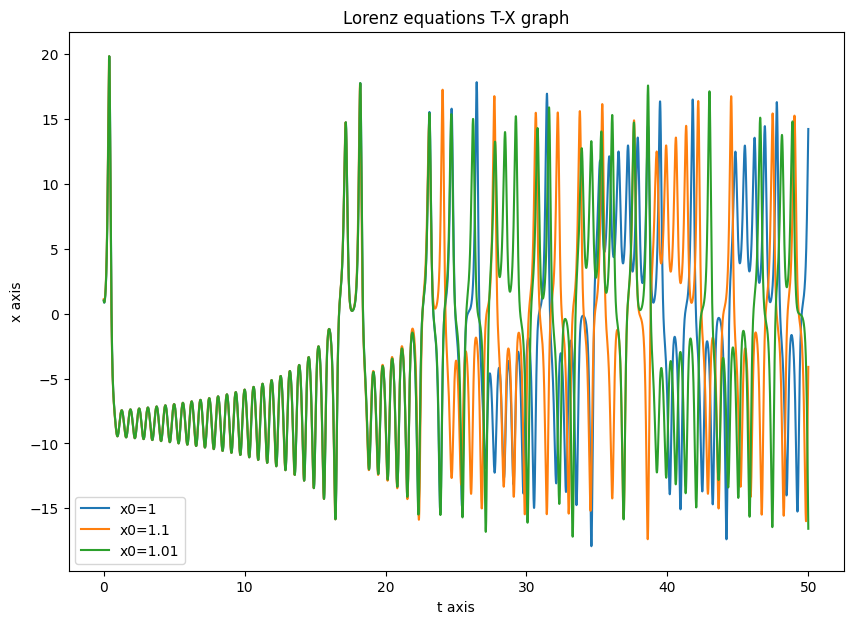

In [ ]:
#t-x 그래프
fig = plt.figure(figsize=(10, 7))
plt.plot(t,x)
plt.plot(t,x2)
plt.plot(t,x3)
plt.title("Lorenz equations T-X graph")
plt.xlabel("t axis")
plt.ylabel("x axis")
plt.legend(('x0=1', 'x0=1.1', 'x0=1.01'))

plt.show()

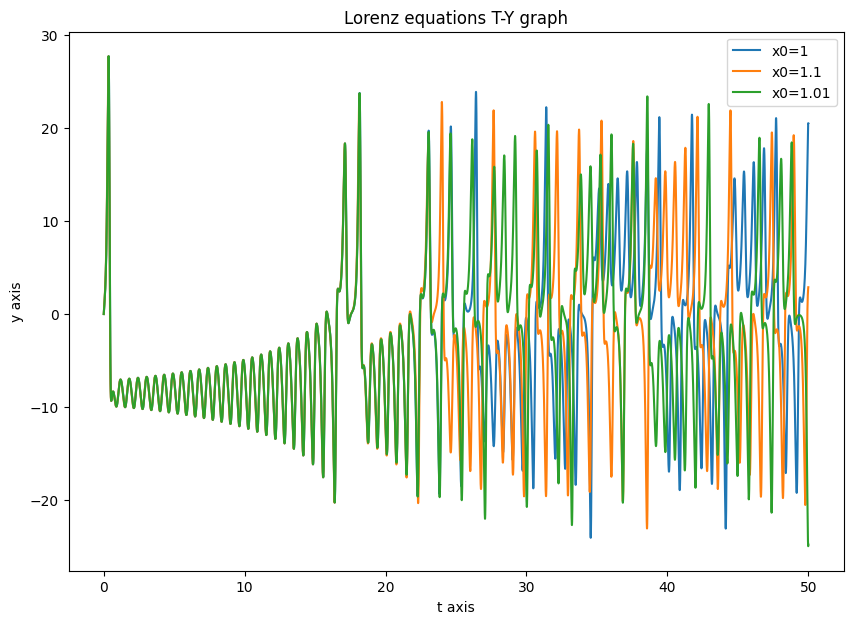

In [ ]:
#t-y 그래프
fig = plt.figure(figsize=(10, 7))
plt.plot(t,y)
plt.plot(t,y2)
plt.plot(t,y3)
plt.title("Lorenz equations T-Y graph")
plt.xlabel("t axis")
plt.ylabel("y axis")
plt.legend(('x0=1', 'x0=1.1', 'x0=1.01'))

plt.show()

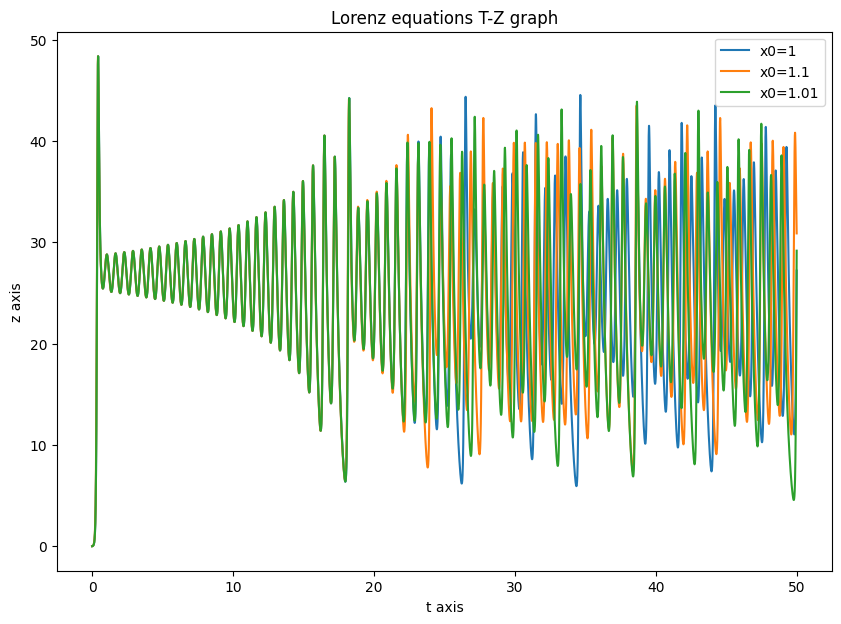

In [ ]:
#t-z 그래프
fig = plt.figure(figsize=(10, 7))
plt.plot(t,z)
plt.plot(t,z2)
plt.plot(t,z3)
plt.title("Lorenz equations T-Z graph")
plt.xlabel("t axis")
plt.ylabel("z axis")
plt.legend(('x0=1', 'x0=1.1', 'x0=1.01'))

plt.show()

**Discuss**

각 초기 조건에 따라 겹쳐 그린 t-x, t-y, t-z그래프를 보면 초반에는 비슷한 값을 가지지만, 뒤로 갈수록 차이가 커지는 것을 확인할 수 있다. 즉 initial conditions이 조금만 변하여도 뒤로 갈수록 값이 크게 변한다. 이것은 Chaos의 가장 큰 특징 중 하나인 Sensitive dependence 또는 Initial condition을 보여준다.

3. For the case with initial conditions (1), plot the trajectory of solutions in phase space (3 dimensions). Plot trajectories projected on x-y, y-z, and x-z planes. Discuss the results.

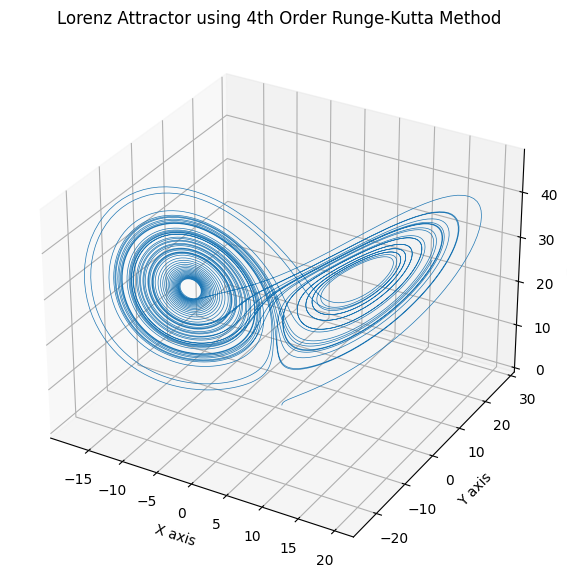

In [ ]:
# 3D 플롯
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z, lw=0.5)
ax.set_title("Lorenz Attractor using 4th Order Runge-Kutta Method")
ax.set_xlabel("X axis")
ax.set_ylabel("Y axis")
ax.set_zlabel("Z axis")
plt.show()

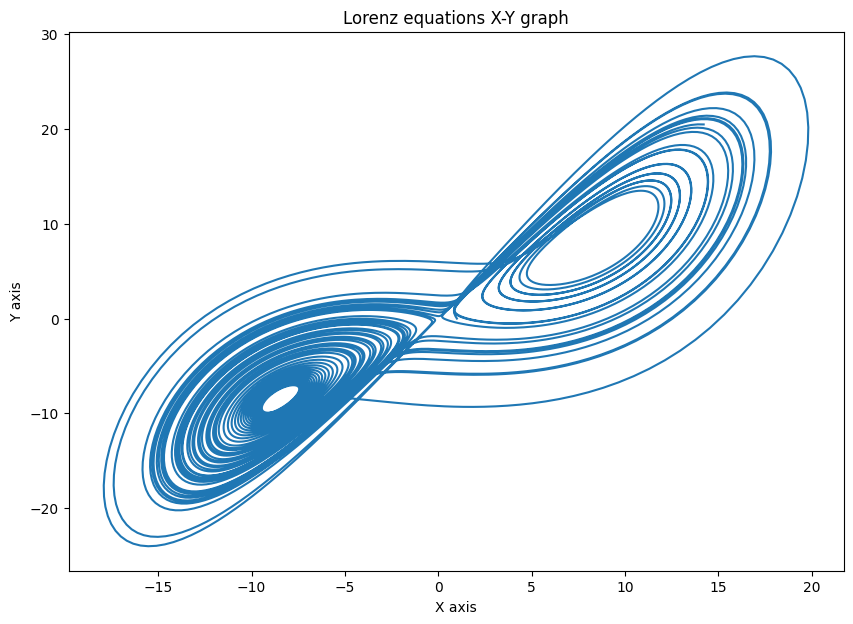

In [ ]:
#x-y 그래프
fig = plt.figure(figsize=(10, 7))
plt.plot(x,y)

plt.title("Lorenz equations X-Y graph")
plt.xlabel("X axis")
plt.ylabel("Y axis")

plt.show()

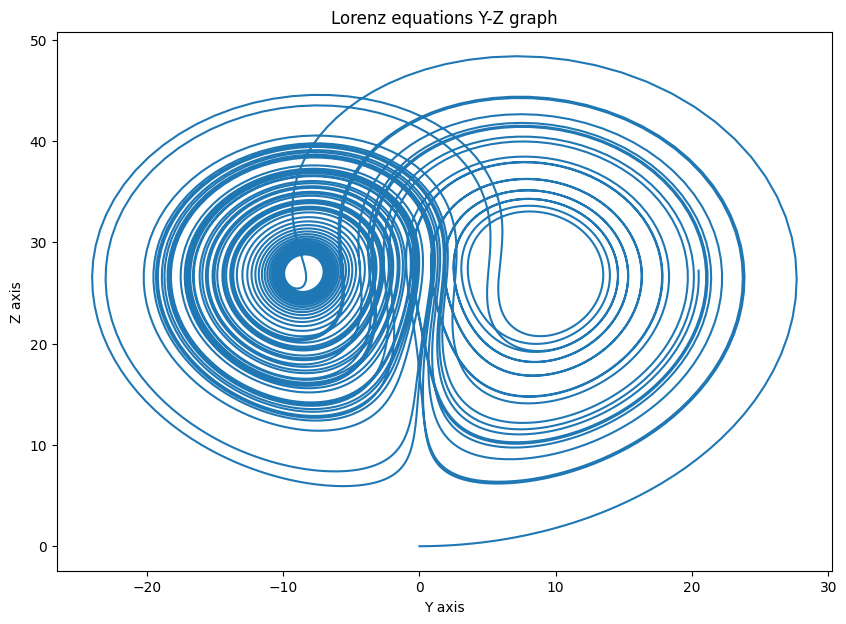

In [ ]:
#y-z 그래프
fig = plt.figure(figsize=(10, 7))
plt.plot(y,z)

plt.title("Lorenz equations Y-Z graph")
plt.xlabel("Y axis")
plt.ylabel("Z axis")

plt.show()

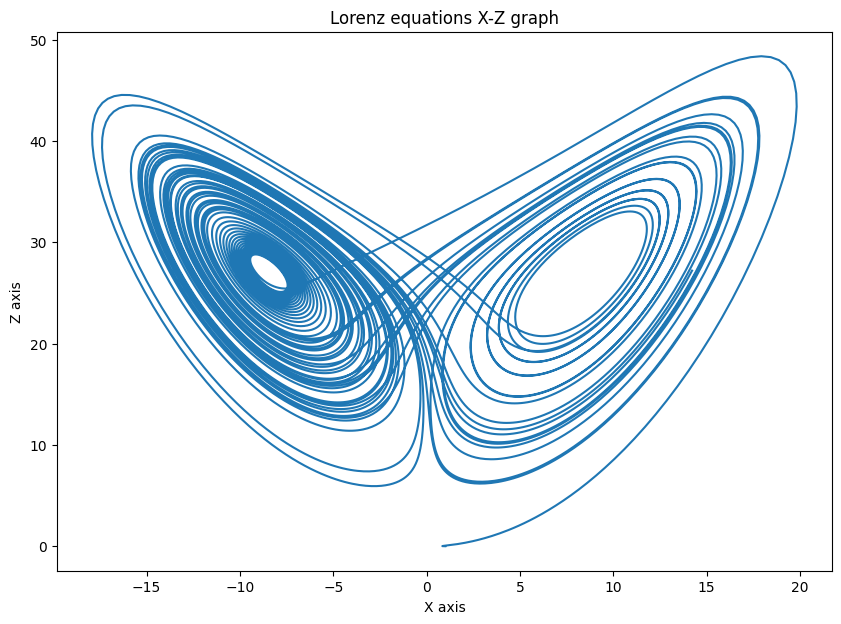

In [ ]:
#x-z 그래프
fig = plt.figure(figsize=(10, 7))
plt.plot(x,z)

plt.title("Lorenz equations X-Z graph")
plt.xlabel("X axis")
plt.ylabel("Z axis")

plt.show()

**Discuss**

x,y,z의 3D그래프를 그려보면 자취가 서로 만나지 않는다는 것을 확인할 수 있다. 또한 x,y,z 3D그래프나, 한 평면에서 그린 그래프나 모두 자취가 타원이 반복되는 형태가 특징적으로 나타난다는 것을 확인할 수 있다.

4. The trajectory in 3 dimensions you plotted in the above problem never meet itself. What does this mean? What is its implication to weather?

**Answer**

만약 어느 시점에서 만나는 점이 생긴다면 그 점을 기점으로 주기적인 운동이 시작될 것이다. 하지만 교점은 아무리 시간이 지나도 발생하지 않고, 이것은 로렌츠 방정식에 따르면 주기적인 운동이 일어나지 않는다는 것이다. 이러한 사실은 대기 중에서 주기적인 사건의 발생이 존재하지 않는다는 것을 의미하고, 날씨가 카오스적이라는 것을 의미한다.